In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math as math

In [2]:
h = sp.symbols('h')
A = sp.Matrix(5,5, lambda i,j: (4-j)**i)
b = sp.Matrix(5,1, [0,0,2*h**(-2),0,0])

In [3]:
sp.linsolve((A, b))

{(11/(12*h**2), -14/(3*h**2), 19/(2*h**2), -26/(3*h**2), 35/(12*h**2))}

In [4]:
A = sp.Matrix([[1,1,1,1,1],[-2,-1,0,1,2],[4,1,0,1,4],[-8,-1,0,1,8],[16,1,0,1,16]])
b = sp.Matrix(5,1, [0,0,2*h**(-2),0,0])

In [5]:
sp.linsolve((A, b)) 

{(-1/(12*h**2), 4/(3*h**2), -5/(2*h**2), 4/(3*h**2), -1/(12*h**2))}

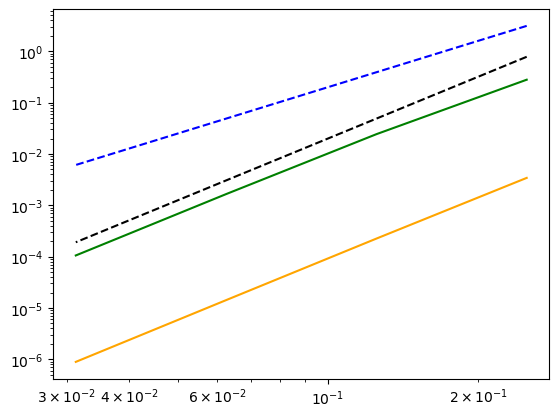

In [18]:
def fdcoeffV(k,xbar,stencil):
    n = len(stencil)
    A = np.ones((n,n))
    xrow = stencil - xbar
    for i in range(1,n):
        A[i,:]= xrow**(i)/math.factorial(i)

    b = np.zeros((n,))
    b[k] = 1
    c = np.linalg.solve(A,b)
    return c

def sec_der(xbar,h,u_func,stencil):
    coeff = fdcoeffV(2,xbar,stencil)
    U = u_func(xbar+h*stencil)
    #print(U)
    der = np.dot(coeff/h**2,U)
    return der

def u_func(x):
    return np.exp(np.cos(x))


#d2 = -np.cos(x)*np.exp(np.cos(x))+(np.sin(x))**2*np.exp(np.cos(x))
d2 = -np.exp(1)

hs = []
errs = []
xbar=0


errs2 = []

for i in range(2,6):
    
    h = 1/2**(i)
    err = abs(sec_der(xbar,h,u_func,np.array([-2,-1,0,1,2])) - d2)
    err2 = abs(sec_der(xbar,h,u_func,np.array([-4,-3,-2,-1,0])) - d2)

    hs.append(h)
    errs.append(err)
    errs2.append(err2)

hs = np.array(hs)
errs = np.array(errs)
errs2 = np.array(errs2)



plt.loglog(hs,200*hs**3,"b--")
plt.loglog(hs,200*hs**4, 'k--')
plt.loglog(hs,errs,color="orange")
plt.loglog(hs,errs2,color="g")
plt.show()

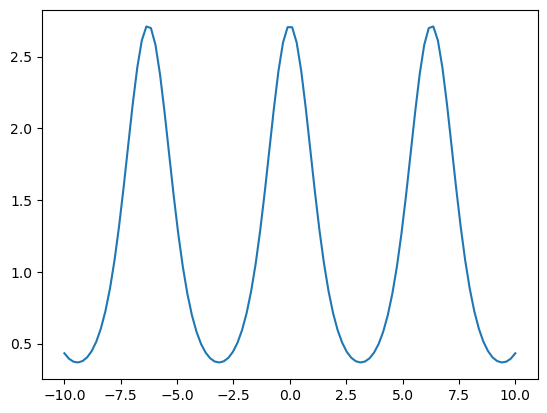

In [23]:
plt.plot(np.linspace(-10,10,100),np.exp(np.cos(np.linspace(-10,10,100))))

In [19]:
np.polyfit(np.log(hs),np.log(errs),1)

array([ 3.96956962, -0.16200765])

In [21]:
np.polyfit(np.log(hs[2:]),np.log(errs2[2:]),1)

array([3.96917988, 4.59935088])

In [9]:
hs

array([0.25   , 0.125  , 0.0625 , 0.03125])

In [10]:
sec_der(0,np.array([-2,-1,0,1,2]),u_func)

TypeError: sec_der() missing 1 required positional argument: 'stencil'

In [ ]:
fdcoeffV(2,0,np.array([-2,-1,0,1,2]))